# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Loading Dataset

In [3]:
df = pd.read_csv('spotify_full_list_20102023.csv')
df.head()

,Unnamed: 0,Artist and Title,Artist,Streams,Daily,year,main_genre,genres,first_genre,second_genre,third_genre
0,0,J. Cole - No Role Modelz,J. Cole,2300753974,987553,2014.0,Hip-Hop/Rap,"['conscious hip hop', 'hip hop', 'north caroli...",conscious hip hop,hip hop,north carolina hip hop
1,1,Sam Smith - Stay With Me,Sam Smith,2135129240,875392,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
2,2,Mark Ronson - Uptown Funk,Mark Ronson,2039781091,675268,2014.0,Pop,['pop soul'],pop soul,Unknown,Unknown
3,3,Sam Smith - I'm Not The Only One,Sam Smith,1926711475,791299,2014.0,Pop,"['pop', 'uk pop']",pop,uk pop,Unknown
4,4,Maroon 5 - Sugar,Maroon 5,1877824112,552959,2014.0,Pop,['pop'],pop,Unknown,Unknown


# Analyzing Dataset

In [4]:
df.dtypes

Unnamed: 0            int64
Artist and Title     object
Artist               object
Streams               int64
Daily                 int64
year                float64
main_genre           object
genres               object
first_genre          object
second_genre         object
third_genre          object
dtype: object

# Number of Streams per Year

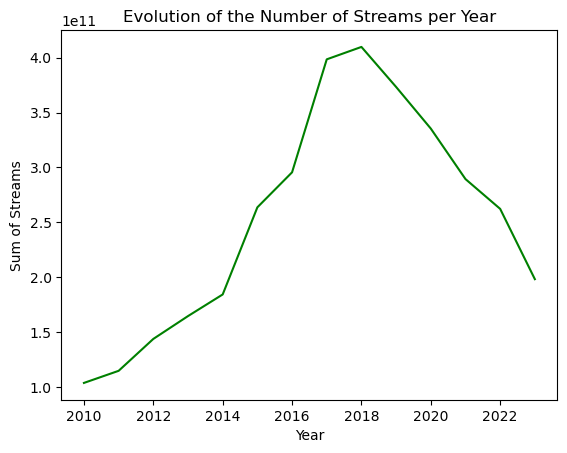

In [5]:
streams_by_year = df.groupby('year')['Streams'].sum().reset_index()

plt.plot(streams_by_year['year'], streams_by_year['Streams'], color = 'green')

plt.xlabel('Year')
plt.ylabel('Sum of Streams')
plt.title('Evolution of the Number of Streams per Year')
plt.show()

# Most Streamed Artist per Year

              Artist    year      Streams
718       Bruno Mars  2010.0   8293227492
125            Adele  2011.0   7070635111
2763    Lana Del Rey  2012.0   6480607571
1442      Ed Sheeran  2013.0  10058587517
4726    Taylor Swift  2014.0   8331412110
2444   Justin Bieber  2015.0   9149203817
4855      The Weeknd  2016.0  13619125677
1443      Ed Sheeran  2017.0  16451109792
3989     Post Malone  2018.0  15306488288
612    Billie Eilish  2019.0  13509987212
487        Bad Bunny  2020.0  16104931029
3761  Olivia Rodrigo  2021.0  12940156687
489        Bad Bunny  2022.0  15774110811
2483         KAROL G  2023.0   5902473899


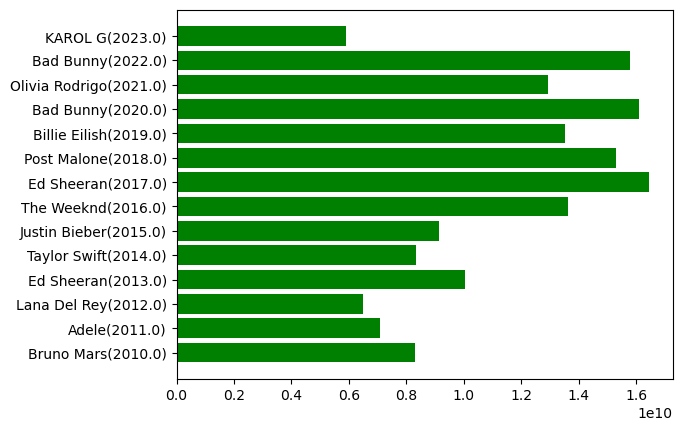

In [7]:
streams_by_artist = df.groupby(['Artist', 'year'])['Streams'].sum().reset_index()

most_streamed = streams_by_artist.loc[streams_by_artist.groupby('year')['Streams'].idxmax()]

print(most_streamed)

plt.barh(most_streamed['Artist'] + '('+ most_streamed['year'].astype(str) + ')', most_streamed['Streams'], color = 'green')
plt.show()

In [8]:
df.columns

Index(['Unnamed: 0', 'Artist and Title', 'Artist', 'Streams', 'Daily', 'year',
       'main_genre', 'genres', 'first_genre', 'second_genre', 'third_genre'],
      dtype='object')

In [9]:
df['main_genre'].unique()

array(['Hip-Hop/Rap', 'Pop', 'Rock', 'R&B/Soul', 'Indie/Alternative',
       'Electronic/Dance', 'World/Traditional', 'Metal', nan,
       'Classical/Orchestral', 'Other'], dtype=object)

# Most Streamed Genres

TypeError: 'str' object is not callable

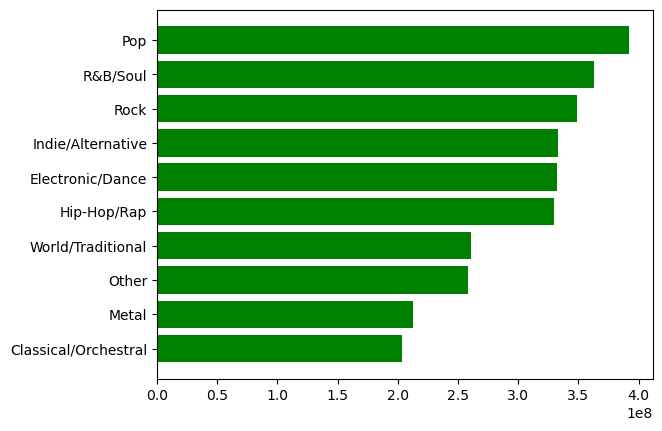

In [39]:
genres = df.groupby('main_genre')['Streams'].mean().reset_index(False)
ordered = genres.sort_values(by='Streams', ascending=True)

plt.barh(ordered['main_genre'], ordered['Streams'], color = 'green')

plt.xlabel('Average Streams')
plt.ylabel('Genre')
plt.title('Most Streamed Genres')
plt.show()

In [51]:
genres_year = df.groupby(['year', 'main_genre'])['Streams'].sum().reset_index()
top_year = genres_year.loc[genres_year.groupby('year')['Streams'].idxmax()]
top_year

,year,main_genre,Streams
6,2010.0,Pop,48563540492
15,2011.0,Pop,52490993110
25,2012.0,Pop,73252968517
34,2013.0,Pop,77948090355
44,2014.0,Pop,102030261016
54,2015.0,Pop,101646595750
64,2016.0,Pop,118176234295
74,2017.0,Pop,188651558234
84,2018.0,Pop,153095894611
93,2019.0,Pop,165288161290
